In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

![](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

classes = np.unique(y)

print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


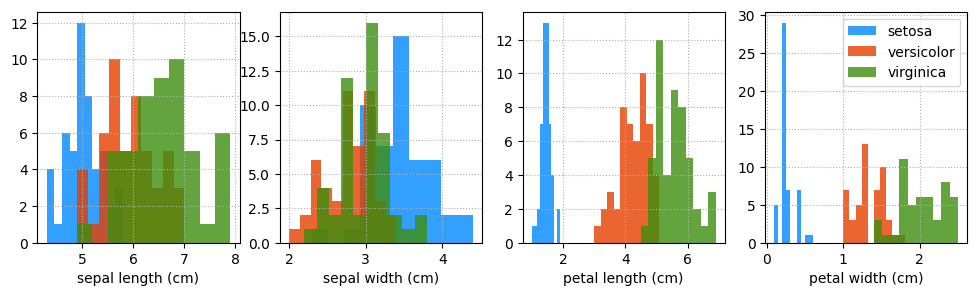

In [3]:
plot_iris_hist()

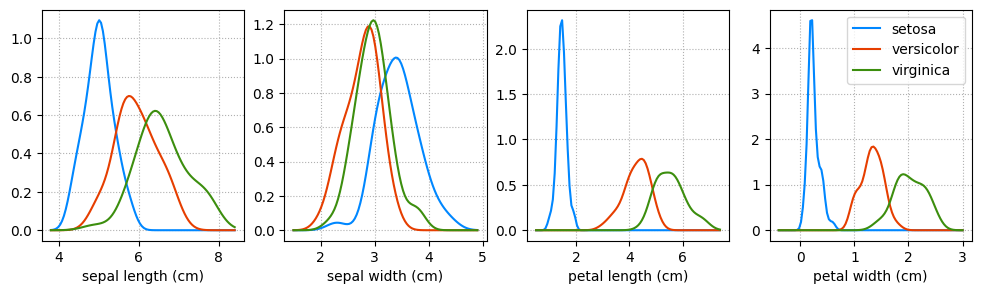

In [4]:
plot_iris_kde()

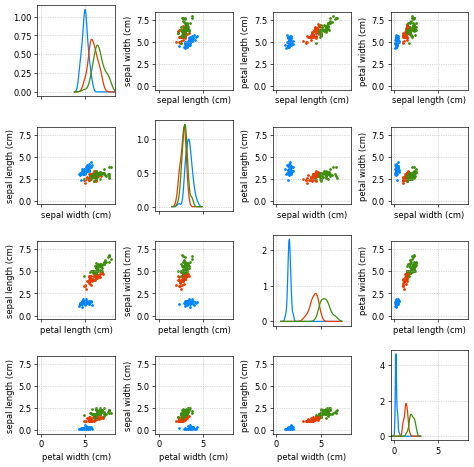

In [5]:
plot_iris_scatter()

In [6]:
from sklearn.decomposition import PCA

x = PCA(n_components=2).fit_transform(X)

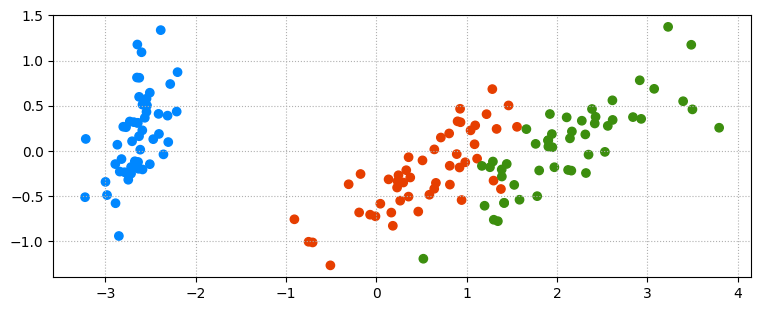

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

ax.scatter(*x.T, c=colors[y])
ax.set_aspect(True)
ax.grid(True, ls=':')

In [9]:
centroids = np.array([
    np.mean(x[y == l], axis=0) for l in classes
])

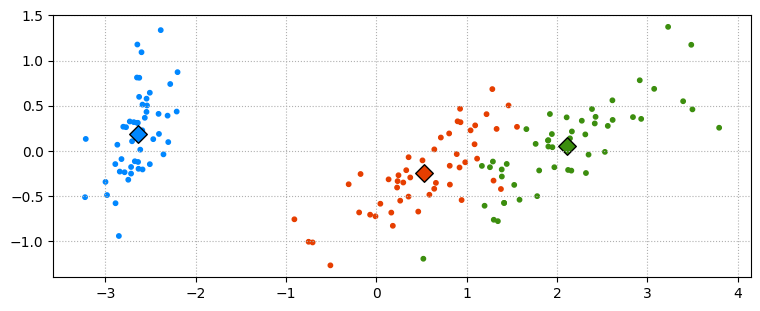

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

ax.scatter(*x.T, c=colors[y], s=10)

for c, center in zip(colors, centroids):
    ax.scatter(*center, marker="D", s=80, facecolor=c, edgecolors='k')

ax.set_aspect('equal')
ax.grid(True, ls=':')

In [12]:
from scipy.spatial.distance import cdist

def nearest_centroid(X, centroids):
    dist_mat = cdist(X, centroids)
    return np.argmin(dist_mat, axis=1)

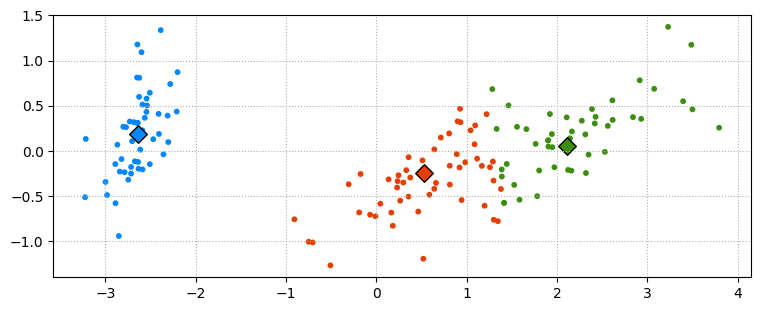

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

x_labels = nearest_centroid(x, centroids)

ax.scatter(*x.T, c=colors[x_labels], s=10)

for c, center in zip(colors, centroids):
    ax.scatter(*center, marker="D", s=80, facecolor=c, edgecolors='k')

ax.set_aspect('equal')
ax.grid(True, ls=':')

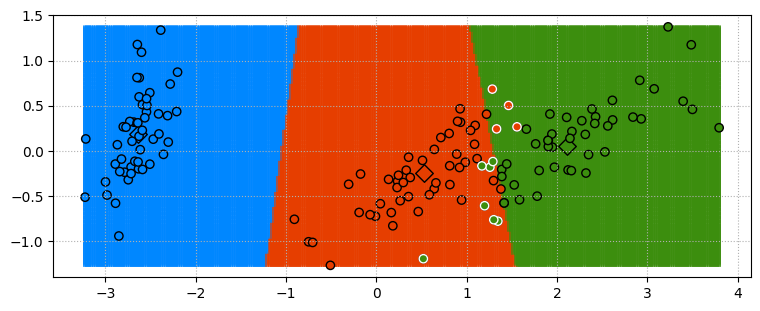

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

P = 300
xmin, ymin = np.min(x, axis=0)
xmax, ymax = np.max(x, axis=0)

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, P),
    np.linspace(ymin, ymax, P)
)

space = np.c_[xx.ravel(), yy.ravel()]

s_label = nearest_centroid(space, centroids)

# Plot space
ax.scatter(*space.T, c=colors[s_label], marker="s", s=8, edgecolors='none', alpha=0.5)

for c, center in zip(colors, centroids):
    ax.scatter(*center, marker="D", s=80, facecolor=c, edgecolors='k')

# Plot points
ax.scatter(*x.T, edgecolors='k', facecolor=colors[y])

# Plot misses
y_pred = nearest_centroid(x, centroids)
x_miss = y_pred != y
ax.scatter(*x[x_miss].T, edgecolors='w', facecolor=colors[y[x_miss]])


ax.set_aspect('equal')
ax.grid(True, ls=':')

# TO JEST ZŁY SPOSÓB WYZNACZANIA DOKŁADNOŚCI!

In [17]:
total_samples = len(x)
x_correct = np.sum(y_pred == y)
accuracy = x_correct / total_samples

print("Example Accuracy:", accuracy)


Example Accuracy: 0.9266666666666666


In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

clf = NearestCentroid()
clf.fit(x, y)
y_pred = clf.predict(x)

accuracy = accuracy_score(y, y_pred)

print("Iris Accuracy:", accuracy)


Iris Accuracy: 0.9266666666666666


# TO JEST PRAWIDŁOWY SPOSÓB WYZNACZANIA DOKŁADNOŚCI.

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold

acc_vec = []

for train, test in RepeatedStratifiedKFold().split(X, y):
    clf = NearestCentroid()
    clf.fit(X[train], y[train])
    y_pred = clf.predict(X[test])

    accuracy = accuracy_score(y[test], y_pred)
    acc_vec.append(accuracy)

print("Accuracy mean:", np.mean(acc_vec))
print("Accuracy std:", np.std(acc_vec))

Accuracy mean: 0.9186666666666666
Accuracy std: 0.043287154881994465
